In [1]:
import pandas as pd
import numpy as np
import json

from app_store_scraper import AppStore
getgo = AppStore(country='sg', app_name='getgo', app_id = '1545316216')

getgo.review(how_many=2000)

2023-02-24 11:41:24,810 [INFO] Base - Initialised: AppStore('sg', 'getgo', 1545316216)
2023-02-24 11:41:24,811 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/sg/app/getgo/id1545316216
2023-02-24 11:41:47,125 [INFO] Base - [id:1545316216] Fetched 440 reviews (440 fetched in total)
2023-02-24 11:42:06,068 [INFO] Base - [id:1545316216] Fetched 520 reviews (520 fetched in total)
2023-02-24 11:42:07,071 [INFO] Base - [id:1545316216] Fetched 616 reviews (616 fetched in total)


In [2]:
getgo.reviews[:10]

[{'date': datetime.datetime(2021, 10, 29, 2, 42, 14),
  'developerResponse': {'id': 26048957,
   'body': "Hey Gracias, thank you for your review! We really appreciate your support and we are so glad you are enjoying our service. 😊 We will definitely take note of your feedback and take it into consideration as we continue to improve on our service! We can't wait to see you continue to enjoy the #FreedomToDrive with us. 🥰\n\nCheers, Natalie",
   'modified': '2021-11-03T06:03:49Z'},
  'review': 'Good point A to point A rental service with no membership fees! The app interface is very intuitive and easy to use although there are some issues connecting to the car to unlock them at times depending on the connection. \n\nAlso, because the rental return is based on the app, essential to make sure your phone as enough battery. The fleets are well maintained, clean and available at many convenient locations. Save $, Don’t need to buy car. :)\n\nSome areas to improve on will be the chat function 

In [3]:
getgodf = pd.DataFrame(np.array(getgo.reviews),columns=['review'])
getgodf2 = getgodf.join(pd.DataFrame(getgodf.pop('review').tolist()))
getgodf2.head()

,date,developerResponse,review,rating,isEdited,title,userName
0,2021-10-29 02:42:14,"{'id': 26048957, 'body': 'Hey Gracias, thank y...",Good point A to point A rental service with no...,4,False,"Convenient rental service, Easy to use app int...",Gracias.i.m
1,2022-01-28 07:52:22,"{'id': 27222908, 'body': 'Hey Vishal, thanks f...",Today booked Ssangyong XLV with GetGo Carshari...,5,True,Need to Access current Booking via Offline (To...,Vishal C B
2,2021-12-04 02:47:08,"{'id': 26796019, 'body': 'Hey Lexus, thank you...",GetGO had a strong community at a certain plat...,5,False,it’s nothing but a PERFECT APP,Lexus Guo
3,2021-12-08 02:23:32,"{'id': 26796398, 'body': 'Hey gogetclean, than...",Hi i would like to reflect on the cleanliness ...,5,False,Responsibility of hirer.,gogetclean
4,2023-02-22 15:45:44,NaN,Two times I encountered the app jammed while o...,3,False,APP SOMETIMES HAVE ISSUES,GETGO USER


In [4]:
getgodf2.to_csv("getgo.csv")  

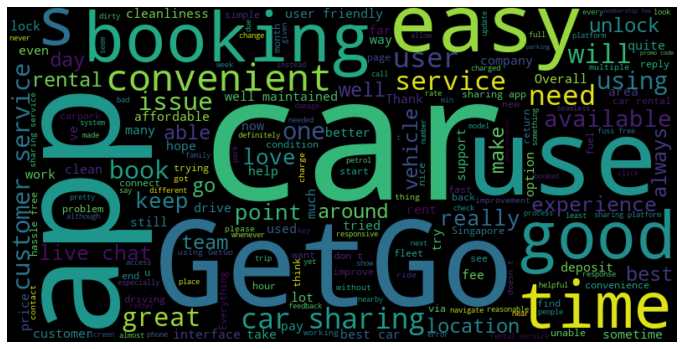

In [4]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# create a word cloud from the review column
text = ' '.join(getgodf2['review'].astype(str))
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [5]:
wordcloud.to_file('wordcloudreview.png')

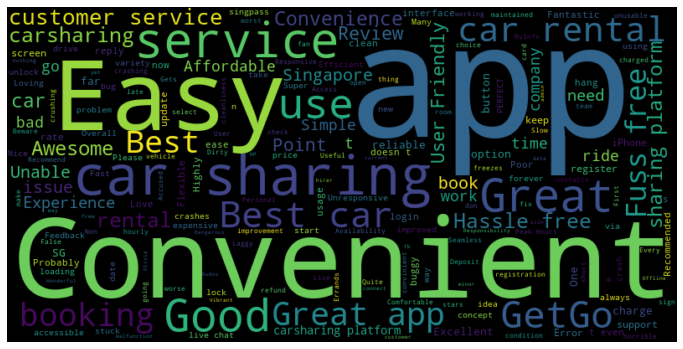

In [5]:
# create a word cloud from the review column
text = ' '.join(getgodf2['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
wordcloud.to_file('wordcloudtitle.png')

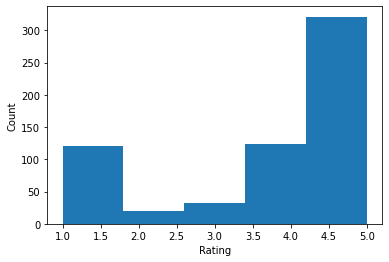

In [6]:

# create a histogram of the rating column
plt.hist(getgodf2['rating'], bins=5)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


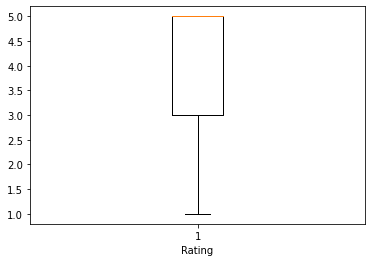

In [7]:


# create a box plot of the rating column
plt.boxplot(getgodf2['rating'])
plt.xlabel('Rating')
plt.show()

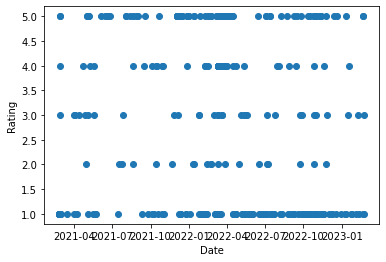

In [8]:


# convert the date column to a datetime format
getgodf2['date'] = pd.to_datetime(getgodf2['date'], format='%Y-%m-%d %H:%M:%S')

# create a scatter plot of rating vs date
plt.scatter(getgodf2['date'], getgodf2['rating'])
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()


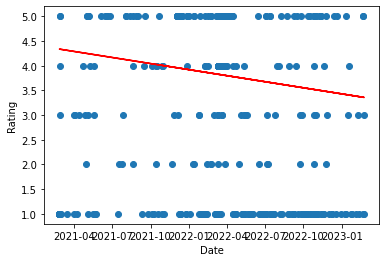

In [9]:
from scipy import stats

# create a scatter plot of rating vs date
plt.scatter(getgodf2['date'], getgodf2['rating'])

# add a linear trendline to the scatter plot
slope, intercept, r_value, p_value, std_err = stats.linregress(getgodf2['date'].astype(int), getgodf2['rating'])
line = slope*getgodf2['date'].astype(int) + intercept
plt.plot(getgodf2['date'], line, color='red')

plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

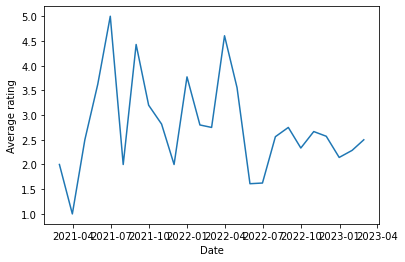

In [10]:

# group the data by month and calculate the mean rating
df_monthly = getgodf2.groupby(pd.Grouper(key='date', freq='M'))['rating'].mean().reset_index()

# create a line chart of the monthly average rating
plt.plot(df_monthly['date'], df_monthly['rating'])
plt.xlabel('Date')
plt.ylabel('Average rating')
plt.show()


In [11]:
# select the rows where the rating is 1
df_rating_1 = getgodf2[getgodf2['rating'] == 1]

df_rating_1['review'].head(10)

8      I faced the exact same issue as a previous rev...
17     If you are a thrill seeker and like surprises,...
35     App crashes with errors, no way around but rei...
38     I booked for an hour but I didn’t turn up to u...
39     Very poor and disappointing customer service o...
57     Great idea - fantastic for the sharing economy...
61     Having a car booked, system or admin doesn’t i...
82     Don't forgo your car for community ones just y...
86     This is my first time using this service and i...
111    Whenever I launched the app or tap anywhere it...
Name: review, dtype: object

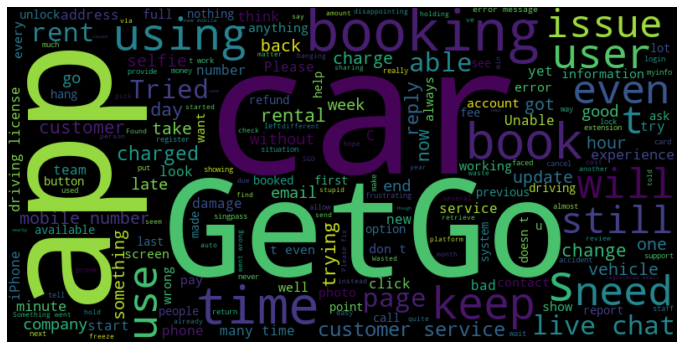

In [12]:
# create a word cloud from the review column
text = ' '.join(df_rating_1['review'].astype(str))
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
wordcloud.to_file('wordcloudrating1.png')

In [14]:
df_monthly

,date,rating
0,2021-02-28,2.000000
1,2021-03-31,1.000000
2,2021-04-30,2.500000
3,2021-05-31,3.625000
4,2021-06-30,5.000000
5,2021-07-31,2.000000
6,2021-08-31,4.428571
7,2021-09-30,3.200000
8,2021-10-31,2.818182
9,2021-11-30,2.000000


In [15]:
from statsmodels.tsa.arima.model import ARIMA

# fit an ARIMA model to the average rating per month
model = ARIMA(df_monthly['rating'], order=(1,1,1))
model_fit = model.fit()

# use the model to make a one-step forecast for the next month
forecast = model_fit.forecast()

# print the forecasted average rating for the next month
print(forecast)


25    2.706629
dtype: float64


In [16]:
df_rating_1

,date,developerResponse,review,rating,isEdited,userName,title
8,2022-11-18 13:46:31,NaN,I faced the exact same issue as a previous rev...,1,False,lingz99,Accused of False Charges
17,2022-04-18 21:53:38,NaN,"If you are a thrill seeker and like surprises,...",1,False,DYLove88,Affordable yet Dangerous Car Rental Service
35,2022-02-04 10:34:48,"{'id': 27916461, 'body': 'Hey Gary, thanks for...","App crashes with errors, no way around but rei...",1,False,Gary Tay,"App crashes - need reinstall. Real Car broken,..."
38,2022-02-13 10:40:27,"{'id': 28253932, 'body': 'Hey Enzaiizi, we're ...",I booked for an hour but I didn’t turn up to u...,1,False,Enzaiizi,Over deduct
39,2023-01-08 07:39:14,"{'id': 34924803, 'body': 'Hi there, thank you ...",Very poor and disappointing customer service o...,1,False,Dsunyo,POOR customer service!
...,...,...,...,...,...,...,...
597,2022-11-11 08:40:14,"{'id': 34959264, 'body': 'Hi there, thank you ...",I was faced with multiple issues with the car ...,1,False,qwercarneg,Horrendous CS support
604,2022-03-17 09:29:12,"{'id': 28712062, 'body': 'Hey Ifan, we're so s...",I made a booking and the car was returned at t...,1,False,Ifan.Z,Don’t trust this company!
612,2021-11-01 04:17:07,"{'id': 26048867, 'body': 'Hey Ohhl, we're so s...",Got the car and the interior smells like a mix...,1,False,Ohhl,No Live Support & Poor Cars
614,2021-05-17 04:04:44,"{'id': 23521519, 'body': 'Hey Shagembeng, than...",I was charged for $156 for using 4hrs. I exten...,1,False,Shagembeng,Expensive 4hrs booking charged at $156


In [17]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models


# Define stopwords and other preprocessing steps
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # remove non-alphabetic characters
    words = text.lower().split()  # convert to lowercase and split into words
    words = [w for w in words if w not in stop_words]  # remove stopwords
    return words

# Apply preprocessing to reviews
doc_clean = [preprocess(doc) for doc in df_rating_1['review']]

# Create dictionary and corpus
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]

# Perform LDA topic modeling
num_topics = 5  # number of topics to generate
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print topics and their most frequent words
for i, topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(f'Topic {i}: {topic}')


2023-02-24 02:00:27,253 [INFO] summarizer.preprocessing.cleaner - 'pattern' package not found; tag filters are not available for English
2023-02-24 02:00:27,265 [INFO] gensim.corpora.dictionary - adding document #0 to Dictionary(0 unique tokens: [])
2023-02-24 02:00:27,268 [INFO] gensim.corpora.dictionary - built Dictionary(1139 unique tokens: ['absolute', 'accused', 'alleged', 'booked', 'c']...) from 120 documents (total 3027 corpus positions)
2023-02-24 02:00:27,273 [INFO] gensim.models.ldamodel - using symmetric alpha at 0.2
2023-02-24 02:00:27,275 [INFO] gensim.models.ldamodel - using symmetric eta at 0.2
2023-02-24 02:00:27,277 [INFO] gensim.models.ldamodel - using serial LDA version on this node
2023-02-24 02:00:27,281 [INFO] gensim.models.ldamodel - running online (multi-pass) LDA training, 5 topics, 10 passes over the supplied corpus of 120 documents, updating model once every 120 documents, evaluating perplexity every 120 documents, iterating 50x with a convergence threshold o

2023-02-24 02:00:27,812 [INFO] gensim.models.ldamodel - topic diff=0.100307, rho=0.408248
2023-02-24 02:00:27,872 [INFO] gensim.models.ldamodel - -7.014 per-word bound, 129.3 perplexity estimate based on a held-out corpus of 120 documents with 3027 words
2023-02-24 02:00:27,873 [INFO] gensim.models.ldamodel - PROGRESS: pass 5, at document #120/120
2023-02-24 02:00:27,906 [INFO] gensim.models.ldamodel - topic #0 (0.200): 0.026*"app" + 0.019*"car" + 0.019*"getgo" + 0.011*"number" + 0.009*"book" + 0.009*"time" + 0.008*"driving" + 0.008*"change" + 0.007*"mobile" + 0.007*"use"
2023-02-24 02:00:27,907 [INFO] gensim.models.ldamodel - topic #1 (0.200): 0.025*"car" + 0.019*"getgo" + 0.014*"booking" + 0.008*"time" + 0.008*"work" + 0.007*"need" + 0.007*"vehicle" + 0.007*"made" + 0.006*"think" + 0.006*"book"
2023-02-24 02:00:27,910 [INFO] gensim.models.ldamodel - topic #2 (0.200): 0.030*"car" + 0.011*"getgo" + 0.009*"time" + 0.008*"even" + 0.008*"cars" + 0.007*"get" + 0.007*"u" + 0.007*"email" + 0

Topic 0: 0.024*"app" + 0.019*"getgo" + 0.019*"car" + 0.011*"number" + 0.009*"time" + 0.008*"book" + 0.008*"driving" + 0.008*"change" + 0.008*"mobile" + 0.007*"use"
Topic 1: 0.026*"car" + 0.019*"getgo" + 0.014*"booking" + 0.009*"work" + 0.008*"time" + 0.007*"need" + 0.007*"vehicle" + 0.007*"made" + 0.006*"book" + 0.006*"think"
Topic 2: 0.030*"car" + 0.011*"getgo" + 0.009*"time" + 0.008*"even" + 0.008*"cars" + 0.007*"get" + 0.007*"u" + 0.007*"email" + 0.007*"charged" + 0.006*"app"
Topic 3: 0.015*"booking" + 0.013*"screen" + 0.010*"car" + 0.010*"app" + 0.008*"getgo" + 0.008*"service" + 0.008*"using" + 0.008*"customer" + 0.008*"charges" + 0.008*"get"
Topic 4: 0.032*"app" + 0.021*"car" + 0.014*"even" + 0.012*"error" + 0.011*"book" + 0.009*"keeps" + 0.009*"issue" + 0.009*"something" + 0.009*"rent" + 0.008*"wrong"
